## *MNIST* — Clasificación de Dígitos Manuscritos

El conjunto de datos **MNIST** es uno de los benchmarks más utilizados en visión artificial y aprendizaje profundo.  
Contiene imágenes de **28×28 píxeles** en escala de grises que representan dígitos del **0 al 9**.  
El objetivo del modelo es aprender a **clasificar cada imagen** en la categoría correspondiente.

---

### Hiperparámetros utilizados

| Parámetro | Valores probados |
|---------|------------------|
| **Optimizadores** | Adagrad, Momentum, Adam |
| **Tasas de aprendizaje** | 0.01, 0.005, 0.003 |
| **Número de épocas** | 50 |
| **Funciones de activación** | Sigmoid y Tanh |
| **Arquitectura de la red** | 3 capas ocultas |
| **Neuronas por capa** | 784 → 80 → 40 → 10 |

---

- La primera capa (**784**) corresponde al número de píxeles de entrada (28×28).
- La última capa (**10**) representa las **10 posibles clases** (dígitos del 0 al 9).
- Se observaron diferencias en velocidad y estabilidad según el optimizador:
  - **Adagrad:** aprendizaje estable pero más lento.
  - **Momentum:** converge más rápido, pero puede oscilar si el learning rate es alto.
  - **Adam:** ofreció los mejores resultados en la mayoría de pruebas.

---

In [19]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [20]:
from main.neural_network.neural_network import train, create_nn, test_nn, predict
from main.neural_network.layers.activation.functions import Tanh, LeakyRelu, Sigmoid, Relu
from main.neural_network.utils.graphics.regression import learning_curve
from main.neural_network.optimizers.rmsprop import RMSProp
from main.neural_network.optimizers.adam import Adam
from main.neural_network.optimizers.sgd import SGD
from main.neural_network.optimizers.momentum import Momentum
from main.neural_network.optimizers.adagrad import Adagrad
from main.neural_network.losses.cross_entropy import CrossEntropyLoss
from main.neural_network.utils.graphics.classification import display_confusion_matrix
from main.neural_network.utils.categorical import to_categorical
from main.neural_network.utils.graphics.classification import display_images
import random
import os

In [21]:
from sklearn.datasets import fetch_openml

In [22]:
SEED = 78
random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

In [23]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)

In [24]:
X = X.reshape(-1, 28, 28, 1)

X_train_raw, X_test_raw = X[:60000], X[60000:]
y_train_raw, y_test_raw = y[:60000], y[60000:]

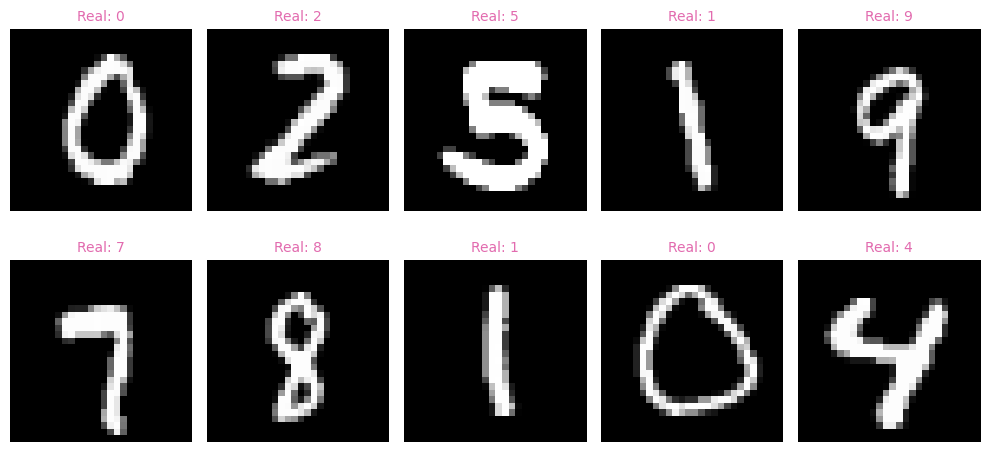

In [25]:
def prepare_samples(x, y, start=0, end=1000):
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[start:end], y[start:end]

x_train, y_train = prepare_samples(X_train_raw, y_train_raw, start=0, end=5000)

x_test, y_test = prepare_samples(X_test_raw, y_test_raw, start=0, end=1000)

x_val, y_val = prepare_samples(X_test_raw, y_test_raw, start=1001, end=1050)

display_images(x_val.reshape(-1, 28, 28), y_val, num_images=10)

In [26]:
optimizers = [
    Adam(learning_rate=0.005),
    RMSProp(learning_rate=0.007),
    SGD(learning_rate=0.01)
]

activations = [Sigmoid(), Tanh(), Sigmoid()]

loss = CrossEntropyLoss()

nn = create_nn([28*28, 100, 50, 10], activation_function=activations, optimizers=optimizers)

In [27]:
train_loss = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=90)

In [28]:
y_true, y_pred = test_nn(nn, x_test, y_test)

Accuracy: 91.7%


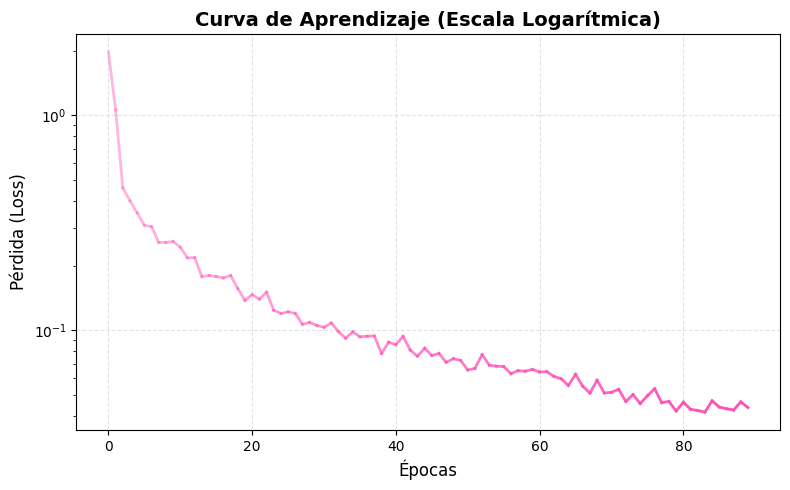

In [29]:
learning_curve(train_loss)

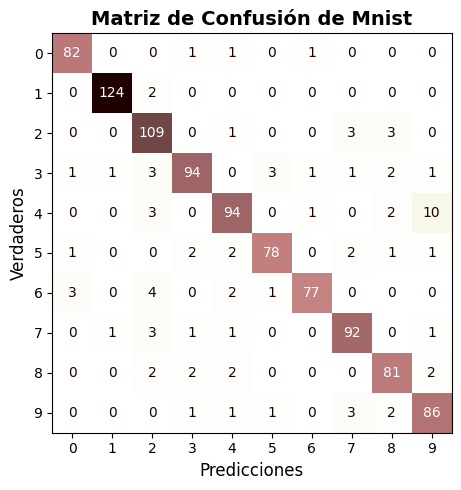

In [30]:
display_confusion_matrix(y_true, y_pred, labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], title='Matriz de Confusión de Mnist')

In [31]:
n = 10
predictions = []
for x in x_val[:n]:
    pred = np.argmax(predict(nn, x))
    predictions.append(pred)

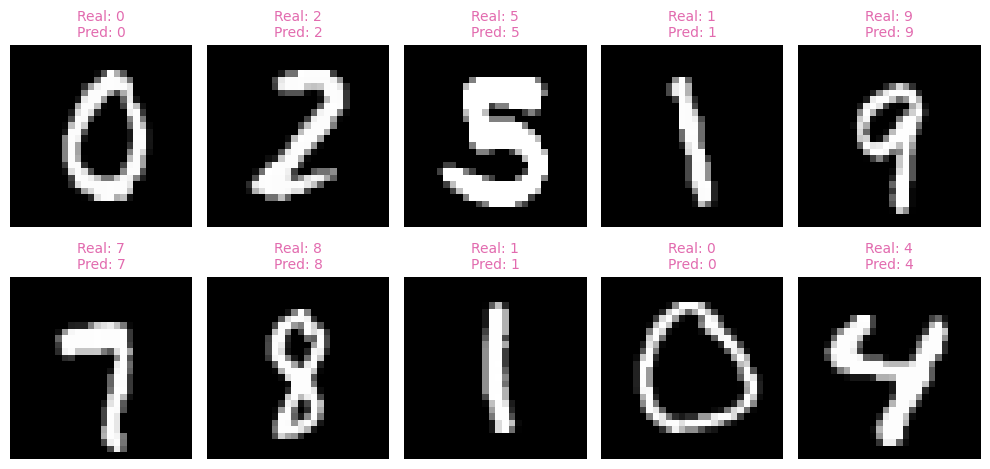

In [32]:
display_images(x_val.reshape(-1, 28, 28), y_val, num_images=n, pred=predictions)

# Experimentos

### Primer test

In [33]:
optimizers = [
    RMSProp(learning_rate=0.007),
    RMSProp(learning_rate=0.007),
    RMSProp(learning_rate=0.007)
]

activations = [Sigmoid(), Sigmoid(), Sigmoid()]

loss = CrossEntropyLoss()

nn = create_nn([28*28, 50, 25, 10], activation_function=activations, optimizers=optimizers)

In [34]:
_ = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=50)

In [35]:
_, _ = test_nn(nn, x_test, y_test)

Accuracy: 91.1%


### Segundo test

In [36]:
optimizers = [
    Adagrad(learning_rate=0.01),
    Momentum(learning_rate=0.005),
    Adam(learning_rate=0.003)
]

activations = [Tanh(), Sigmoid(), Tanh()]

nn = create_nn([28*28, 80, 40, 10], activation_function=activations, optimizers=optimizers)

In [37]:
_ = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=50)

In [38]:
_, _ = test_nn(nn, x_test, y_test)

Accuracy: 81.9%


### Tercer test

In [39]:
optimizers = [
    RMSProp(learning_rate=0.007),
    SGD(learning_rate=0.01),
    Adam(learning_rate=0.003)
]

activations = [LeakyRelu(), Relu(), Sigmoid()]

nn = create_nn([28*28, 150, 75, 10], activation_function=activations, optimizers=optimizers)


In [40]:
_ = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=50)

In [41]:
_, _ = test_nn(nn, x_test, y_test)

Accuracy: 33.7%


### Cuarto test

In [42]:
optimizers = [
    Adagrad(learning_rate=0.03),
    Momentum(learning_rate=0.01),
    Adam(learning_rate=0.08)
]

activations = [Tanh(), Tanh(), Sigmoid()]

loss = CrossEntropyLoss()

nn = create_nn([28*28, 80, 40, 10], activation_function=activations, optimizers=optimizers)

In [43]:
_ = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=50)

In [44]:
_, _ = test_nn(nn, x_test, y_test)

Accuracy: 36.9%


| Test | Problema | Arq.                 | Act.                       | Opt.                         | Loss | LR (capas)          | Ep. | Train Loss | Test Acc. |
|-----:|----------|----------------------|----------------------------|------------------------------|------|---------------------|----:|-----------:|----------:|
| 1    | MNIST    | [784, 100, 50, 10]   | Sigmoid → Tanh → Sigmoid   | Adam → RMSProp → SGD         | CE   | (mixto)             | 90  | 0.0462     | **91.7%** |
| 2    | MNIST    | [784, 50, 25, 10]    | Sigmoid → Sigmoid → Sigmoid| RMSProp ×3                   | CE   | 0.001 × todas       | 50  | 0.1966     | **91.1%** |
| 3    | MNIST    | [784, 80, 40, 10]    | Tanh → Sigmoid → Tanh      | Adagrad → Momentum → Adam    | CE   | (mixto)             | 50  | 0.5514     | **81.9%** |
| 4    | MNIST    | [784, 150, 75, 10]   | LeakyReLU → ReLU → Sigmoid | RMSProp → SGD → Adam         | CE   | (mixto)             | 50  | 26.6970    | **33.7%** |
| 5    | MNIST    | [784, 80, 40, 10]    | Tanh → Tanh → Sigmoid      | Adagrad → Momentum → Adam    | CE   | (mixto)             | 50  | 24.8260    | **36.9%** |

# Prueba con Capas Convolutivas

In [45]:
from main.neural_network.optimizers.initialize_optimizers_per_layer import initialize_optimizer
from main.neural_network.neural_network import FullyConnectedLayer
from main.neural_network.layers.reshape.flatten import Flatten
from main.neural_network.layers.conv_layer import Convolutional
from main.neural_network.optimizers.adam import Adam
from main.neural_network.layers.activation.functions import Sigmoid
from sklearn.datasets import fetch_openml
import numpy as np

In [46]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist.data.astype("float32") / 255.0   # normalizar
y = mnist.target.astype(int)

X = X.reshape(-1, 1, 28, 28)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

X_val, y_val = X_train[50000:], y_train[50000:]
X_train, y_train = X_train[:50000], y_train[:50000]

def to_one_hot(y):
    return np.eye(10, dtype=np.float32)[y].reshape(-1, 10, 1)

y_train = to_one_hot(y_train)
y_val   = to_one_hot(y_val)
y_test  = to_one_hot(y_test)

print("Shapes:")
print("X_train:", X_train.shape)  
print("y_train:", y_train.shape) 
print("X_val:  ", X_val.shape)
print("y_val:  ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test:", y_test.shape)

Shapes:
X_train: (50000, 1, 28, 28)
y_train: (50000, 10, 1)
X_val:   (10000, 1, 28, 28)
y_val:   (10000, 10, 1)
X_test:  (10000, 1, 28, 28)
y_test: (10000, 10, 1)


In [47]:
optimizers = [
    Adam(learning_rate=0.001),
    Adam(learning_rate=0.001),
    Adam(learning_rate=0.001),
    Adam(learning_rate=0.001),
]

cnn = [
    Convolutional(input_shape=(1, 28, 28), kernel_size=3, depth=32, optim=optimizers[0]),
    Sigmoid(),

    Convolutional(input_shape=(32, 26, 26), kernel_size=3, depth=64, optim=optimizers[1]),
    Sigmoid(),

    Flatten(input_shape=(64, 24, 24), output_shape=(64 * 24 * 24,)),

    FullyConnectedLayer(64 * 24 * 24, 128, optimizer=optimizers[2]),
    Sigmoid(),

    FullyConnectedLayer(128, 10, optimizer=optimizers[3]),
]

initialize_optimizer(cnn, optimizers)

def trace_shapes(net, sample):
    a = sample
    print("input:", a.shape)
    for i, layer in enumerate(net, 1):
        a = layer.forward(a)
        print(f"{i:02d} {layer.__class__.__name__:<20} -> {a.shape}")
    return a

print(">>> Comprobación de shapes con una muestra:")
_ = trace_shapes(cnn, X_train[0])  



>>> Comprobación de shapes con una muestra:
input: (1, 28, 28)
01 Convolutional        -> (32, 26, 26)
02 Sigmoid              -> (32, 26, 26)
03 Convolutional        -> (64, 24, 24)
04 Sigmoid              -> (64, 24, 24)
05 Flatten              -> (36864,)
06 FullyConnectedLayer  -> (128, 128)
07 Sigmoid              -> (128, 128)
08 FullyConnectedLayer  -> (10, 128)
